## Homework 1
#### Kevin Saavedra
kms22@pdx.edu

This assignment was completed using the Python with the Pandas data analysis libary. It was produced in a Jupyter notebook environment running on Anaconda 5.1, which is encouraged at Metro for data sharing and reproducibility purposes, as well as 'realtime' code inputs and outputs.

The complete notebook file can be found at: https://github.com/saashimi/USP_587/blob/master/hw1.ipynb.

###### Summary Findings
The unweighted mean of 1.94 vehicle per households is consistent with personal observations.  There is a notable jump (57%, see Fig 5) in vehicle trips from 1 vehicle households to 2 vehicle households. There appears to be a slight decrease in vehicle trips from 0 vehicle households to 1 vehicle households (Fig 5). A hypothesis is that 0 vehicle households tend to have lower incomes (see .508 correlation in Code block 20 output) and may see an increased number of work trips due to multiple jobs. There is a slight difference in weighted vehicle averages and non-weighted averages, suggesting that collected data is fairly accurate but may be slightly overreported.  In contrast, the weighted transit ridership is slightly higher at 28 percent, compared with the unweighted average of 27 percent. Generally, higher incomes translate to more trips (Fig 6).

###### Summary of Issues
In the future, I would like to complete this assignment using R instead of a Python/Pandas workflow, as this is more consistent with Metro's practices. However, for the sake of expediency and fluency with the language, I opted to use Python. Nonetheless, when coding for a dataset like this, it's easy to overlook errors without a second set of eyes for QA/QC. I'd like to be more proactive with comparing results going forward.

I would like to know more about the built-in functions (e.g. CORR for calculating correlations between data) as I'm not quite sure what is going on under the hood. 

I am a bit suspicious of the weighted and unweighted RIBUS percentages I calculated (28 percent), as this seems a bit high.  12% is the figure I think is accurate for the Metro Region, but for daily work commuters.

### 1. Examine the characteristics of the household data set
__a) Using appropriate descriptive statistics (mean, median, min and max, standard deviation, frequency/percentage, etc) and visualization techniques (e.g., histogram, bar chart) to describe type of residence(RESTY), income (INCOME), number of vehicles (HHVEH), and number of trips (HTRIPS) in the household data. Pay attention to which descriptive statistics and visualization are appropriate for each variable and think about how best to handle the missing value category (for example, 99 in INCOME).__

In [57]:
# Code block 1
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#wd = '/Users/kevin/Desktop/USP_587_data/OHAS_v2/'
wd = 'C:/Users/saavedrak/Desktop/USP_587_data/OHAS_v2/'
#wd = 'C:/Users/kevin/Desktop/USP_587_data/OHAS_v2/'

df = pd.read_csv(os.path.join(
    os.path.dirname("__file__"), 
    wd + 'household.csv'), usecols=['resty', 'income', 'hhveh', 'htrips'])

# Count number of rows/columns in dataset:
print("There are {} rows and {} columns in the" \
      "dataset.".format(df.shape[0], df.shape[1]))

df_resty = df
df_resty['resty'].describe().to_frame().style.set_caption(
    'Table 1. Summary Statistics of Column `resty`')

There are 6449 rows and 4 columns in thedataset.


,resty
count,6449
mean,1.40177
std,0.852127
min,1
25%,1
50%,1
75%,1
max,9


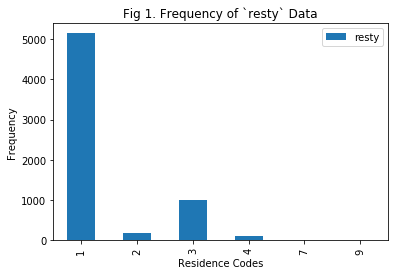

In [58]:
# Code block 2
grouped = df_resty.groupby(['resty'])['resty'].count().to_frame()
grouped.plot.bar();
plt.title('Fig 1. Frequency of `resty` Data');
plt.ylabel('Frequency');
plt.xlabel('Residence Codes');

In [59]:
# Code block 3
# Exclude responses of 99 'REFUSED'
df_inc = df.loc[df['income'] != 99]
df_inc['income'].describe().to_frame().style.set_caption(
    'Table 2. Summary Statistics of Column `income`')

,income
count,6019
mean,5.05616
std,1.91134
min,1
25%,4
50%,5
75%,7
max,8


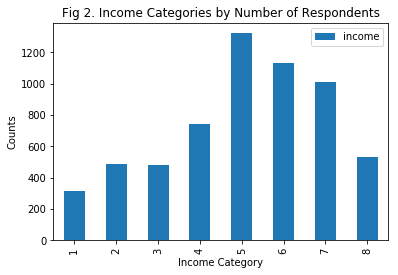

In [60]:
# Code block 4
grouped = df_inc.groupby(['income'])['income'].count().to_frame()
grouped.plot.bar();
plt.title('Fig 2. Income Categories by Number of Respondents')
plt.ylabel('Counts');
plt.xlabel('Income Category');

In [61]:
# Code block 5
df_veh = df.loc[df['hhveh'] != 99]
df_veh['hhveh'].describe().to_frame().style.set_caption(
    'Table 3. Summary Statistics of Column `hhveh`')

,hhveh
count,6449
mean,1.94821
std,1.12417
min,0
25%,1
50%,2
75%,2
max,8


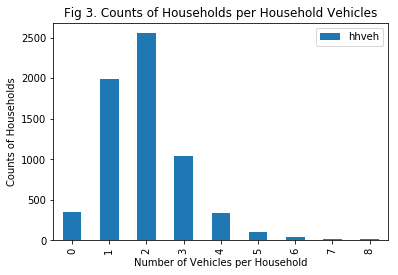

In [62]:
# Code block 6
grouped = df_veh.groupby(['hhveh'])['hhveh'].count().to_frame()
grouped.plot.bar();
plt.title('Fig 3. Counts of Households per Household Vehicles')
plt.ylabel('Counts of Households');
plt.xlabel('Number of Vehicles per Household');

In [63]:
df['htrips'].describe().to_frame().style.set_caption(
    'Table 4. Summary Statistics of Column `htrips`')

,htrips
count,6449
mean,9.81517
std,7.81912
min,0
25%,4
50%,8
75%,14
max,81


__b) Calculate average number of trips, first by number of vehicles and then by Income. Based on your calculation, how do you describe the relationship between number of vehicles and number of trips? Income and number of trips?__

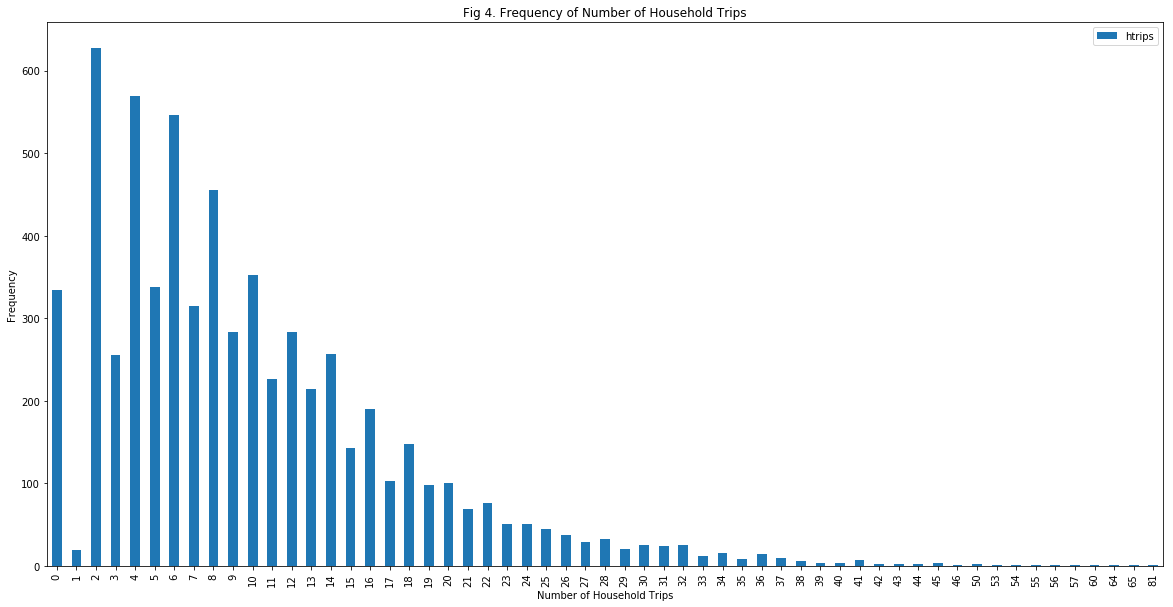

In [64]:
# Code block 7
grouped = df_veh.groupby(['htrips'])['htrips'].count().to_frame()
grouped.plot.bar(figsize=(20,10));
plt.title('Fig 4. Frequency of Number of Household Trips')
plt.ylabel('Frequency');
plt.xlabel('Number of Household Trips');

__b) Calculate average number of trips, first by number of vehicles...__

In [65]:
# Code block 8
df_veh1 = df.groupby(['hhveh'])['htrips'].mean().to_frame(
    'htrips_avg')
df_veh1.style.set_caption(
    'Table 5. Average Trips by Total Number of Household Vehicles')

,htrips_avg
hhveh,
0,7.92507
1,6.98894
2,11.0666
3,11.666
4,12.1603
5,12.3774
6,10.907
7,13.4167
8,8.91667


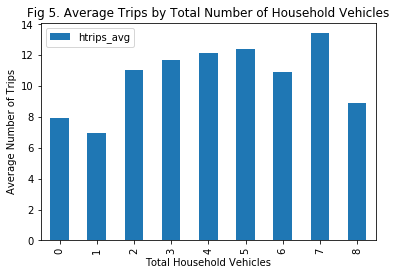

In [66]:
# Code block 9
df_veh1.plot.bar();
plt.title('Fig 5. Average Trips by Total Number of Household Vehicles');
plt.xlabel('Total Household Vehicles');
plt.ylabel('Average Number of Trips');

__...and then by Income.__

In [67]:
# Code block 10
df_vi = df_inc.groupby(['income'])['htrips'].mean().to_frame('htrips_avg')
df_vi.style.set_caption(
    'Table 6. Average Number of Trips per Household by Income Category'\
    ' (Excludes refusals)' )

,htrips_avg
income,
1,6.35987
2,6.83711
3,6.82881
4,8.07941
5,9.67752
6,11.2416
7,12.2448
8,12.6226


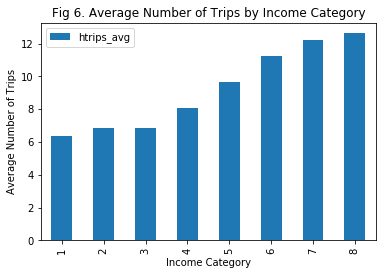

In [68]:
# Code block 11
df_vi.plot.bar();
plt.title('Fig 6. Average Number of Trips by Income Category');
plt.xlabel('Income Category');
plt.ylabel('Average Number of Trips');

__Based on your calculation, how do you describe the relationship between number of vehicles and number of trips? Income and number of trips?__

Having two or more vehicles generally sees an increase in number of trips compared to zero or single-car households. The largest jump is from 1 to 2 cars per household, a 57% increase in trips. However, there is little difference between having 2-7 cars per household in terms of trips. The highest number of cars owned per household (8) actually sees fewer trips than the next highest categories.

__Income?__

Lowest income levels have similar numbers of trips, but generally speaking, the number of trips increase with income. 

__c) Create a new variable INC_CAT that collapses the 8 income categories in the raw INCOME column into 3 categories (e.g. \$0 - \$24,999, \$25,000 - \$49,999, \$50,000 and above).__

In [69]:
# Code block 12
def income_categorizer(df_inc):
    for index, row in df_inc.iterrows():
        if row.income <= 2:
            df_inc.set_value(index, 'inc_cat', 1)
        elif row.income >= 3 and row.income <= 4:
            df_inc.set_value(index, 'inc_cat', 2)
        elif row.income >= 5:
            df_inc.set_value(index, 'inc_cat', 3)
    return df_inc
        
df_new_inc_cat = income_categorizer(df)

__Count number of households within each INC_CAT...__

In [70]:
# Code block 13
df_new_inc_cat.groupby(['inc_cat']).size().to_frame(
    'num_households').style.set_caption(
    "Table 7. Number of households by inc_cat")

,num_households
inc_cat,
1.0,799
2.0,1222
3.0,4428


__...and then calculate average number of trips by INC_CAT.__

In [71]:
# Code block 14
df_new_inc_cat.groupby(['inc_cat'])['htrips'].mean().to_frame(
    'htrips_avg').style.set_caption(
    'Table 8. Average Number of Trips by Income Category')

,htrips_avg
inc_cat,
1.0,6.64956
2.0,7.5892
3.0,11.0007


__Create a new variable INCVAL that is equal to the mid-point of the range for categories 1 through 7 and $250,000 for category 8 (Set missing values for category 99). Run frequencies and summary to compute the mean and standard deviation for this new variable. Calculate the correlation between INCVAL and number of trips (HTRIPS).__

In [72]:
# Code block 16
def set_incval(df_incval):
    """
    Creates new variable `incval` that is equal to the midpoint of indicated 
    salary ranges.
    """
    for index, row in df_incval.iterrows():
        if row.income == 1:
            df_incval.set_value(index, 'incval', ((14999-0)/2 + 0))
        elif row.income == 2:
            df_incval.set_value(index, 'incval', ((15000-24999)/2 + 24999))
        elif row.income == 3:
            df_incval.set_value(index, 'incval', ((34999-25000)/2 + 25000))
        elif row.income == 4:
            df_incval.set_value(index, 'incval', ((49999-35000)/2 + 35000))
        elif row.income == 5:
            df_incval.set_value(index, 'incval', ((74999-50000)/2 + 50000))
        elif row.income == 6:
            df_incval.set_value(index, 'incval', ((99999-75000)/2 + 75000)) 
        elif row.income == 7:
            df_incval.set_value(index, 'incval', ((149999-100000)/2 + 100000))
        elif row.income == 8:
            df_incval.set_value(index, 'incval', 250000)
        elif row.income == 99:
            df_incval.set_value(index, 'incval', None) 
            # Setting 99 as NA, so it won't be counted.         
    return df_incval

df_incval_new = set_incval(df_new_inc_cat)
df_incval_new.describe().style.set_caption(
    'Table 9. Summary Statistics of Selected Columns')

,hhveh,resty,income,htrips,inc_cat,incval
count,6449,6449,6449,6449,6449,6019
mean,1.94821,1.40177,11.32,9.81517,2.56272,82889.6
std,1.12417,0.852127,23.5098,7.81912,0.702804,62390.2
min,0,1,1,0,1,7499.5
25%,1,1,4,4,2,42499.5
50%,2,1,5,8,3,62499.5
75%,2,1,7,14,3,125000
max,8,9,99,81,3,250000


__Explain why the mean and standard deviation from the original income category (INCOME) variable would not be useful.__

Original INCOME variables are not useful since they are coded values and do accurately convey the actual dollar amounts needed for useful analysis.

__Calculate the correlation between INCVAL and number of trips__

In [73]:
# Code block 17
print('Correlation between incval and htrips:')
print(df_incval_new['incval'].corr(df_incval_new['htrips']))

Correlation between incval and htrips:
0.22775753948597108


__Recode HHVEH into a new variable HHVEH_CAT to reduce the size of the table (this will make interpretation easier). Use judgment about which groups to combine (review your frequency analysis in Question a) in making these judgments). You can accomplish the regrouping by using the RECODE command in SPSS (or cut function in R and if function in Excel). When grouping variables, you should create a new variable and modify the variable name value labels appropriately. Calculate average number of trips by HHVEH_CAT.__ 

In [74]:
# Code block 18
def vehicle_categorizer(df_veh):
    for index, row in df_inc.iterrows():
        if row.hhveh == 0:
            df_veh.set_value(index, 'hhveh_cat', 0)
        elif row.hhveh == 1:
            df_veh.set_value(index, 'hhveh_cat', 1)
        elif row.hhveh == 2:
            df_veh.set_value(index, 'hhveh_cat', 2)
        elif row.hhveh >= 3:
            df_veh.set_value(index, 'hhveh_cat', 3)
    return df_veh


df_veh_cat_new = vehicle_categorizer(df)
df_veh_cat_new.groupby([
    'hhveh_cat'])['htrips'].mean().to_frame().style.set_caption(
    'Table 10. Average Number of Trips by hhveh_cat')

,htrips
hhveh_cat,
0.0,7.97313
1.0,6.99945
2.0,11.1258
3.0,11.7132


__What is the advantage of this calculation comparing with the average number of trips by number of vehicles in question b)?__

Regrouping the hhveh number allows us to better match average vehicle ownership rates per household in the U.S. 

In [75]:
# Code block 19
print('Correlation between income and htrips:')
print(df_veh_cat_new['income'].corr(df_veh_cat_new['htrips']))
print('Correlation between incval and htrips:')
print(df_veh_cat_new['incval'].corr(df_veh_cat_new['htrips']))
print('Correlation between inc_cat and htrips:')
print(df_veh_cat_new['inc_cat'].corr(df_veh_cat_new['htrips']))
print('Correlation between hhveh and htrips:')
print(df_veh_cat_new['hhveh'].corr(df_veh_cat_new['htrips']))
print('Correlation between hhveh_cat and htrips:')
print(df_veh_cat_new['hhveh_cat'].corr(df_veh_cat_new['htrips']))

Correlation between income and htrips:
0.009354924462337915
Correlation between incval and htrips:
0.22775753948597108
Correlation between inc_cat and htrips:
0.21953006181990783
Correlation between hhveh and htrips:
0.20514602823433548
Correlation between hhveh_cat and htrips:
0.22888844496188693


In [76]:
# Code block 20
print('Correlation between income and resty:')
print(df_veh_cat_new['income'].corr(df_veh_cat_new['resty']))
print('Correlation between incval and resty:')
print(df_veh_cat_new['incval'].corr(df_veh_cat_new['resty']))
print('Correlation between inc_cat and resty:')
print(df_veh_cat_new['inc_cat'].corr(df_veh_cat_new['resty']))
print('Correlation between hhveh and resty:')
print(df_veh_cat_new['hhveh'].corr(df_veh_cat_new['resty']))
print('Correlation between hhveh_cat and resty:')
print(df_veh_cat_new['hhveh_cat'].corr(df_veh_cat_new['resty']))
print('Correlation between hhveh_cat and income:')
print(df_veh_cat_new['hhveh_cat'].corr(df_veh_cat_new['income']))

Correlation between income and resty:
-0.0162821497354745
Correlation between incval and resty:
-0.2803100704706675
Correlation between inc_cat and resty:
-0.3519339774256669
Correlation between hhveh and resty:
-0.3621330617193173
Correlation between hhveh_cat and resty:
-0.41460350230683385
Correlation between hhveh_cat and income:
0.5082438241423205


y=0.02304354093977337x+0.037371754637596795


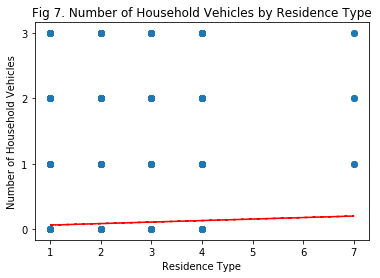

In [77]:
# Code block 21
df_resty_new = df_veh_cat_new.loc[df_veh_cat_new['resty'] != 9]
x = df_resty_new['resty']
y = df_resty_new['hhveh_cat']

plt.scatter(x, y);
# Fit trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print ("y={}x+{}".format(z[0],z[1]))
plt.title('Fig 7. Number of Household Vehicles by Residence Type');
plt.xlabel('Residence Type');
plt.ylabel('Number of Household Vehicles');
plt.yticks(np.arange(0, 4,step=1));

## 2. Understand weights in survey data

__Explain what the weight column (hhwgt and exphhwgt) is (or does)?__

They assign weights to households to give more or less emphasis to certain responses, possibly as calibration for a full population's size.

__Create a new variable by multiplying the number of trips with the household weighting factor (exphhwgt), for example, for the first household in the household table in OHAS data set, 3 vehicles &ast; weighting factor of 217.05 = 651.15 weighted vehicles__

In [78]:
# Code block 22
df = pd.read_csv(os.path.join(
    os.path.dirname("__file__"), 
    wd + 'household.csv'), usecols=['resty', 'income', 'hhveh', 
                                    'hhwgt', 'htrips', 'exphhwgt'])
df['hhvehwgt'] = df['exphhwgt'] * df['hhveh']
df.iloc[0].to_frame().style.set_caption(
    'Table 11. Output of first line in data (row 0) to check work')

,0
hhveh,3
resty,1
income,5
htrips,6
hhwgt,1.5912
exphhwgt,217.054
hhvehwgt,651.163


__Sum the new variable created in step 1 over all samples (households) and sum the entire weighting factor (exphhwgt) over all samples (households);__

In [79]:
# Code block 23
sum_hhvehwgt = df['hhvehwgt'].sum()
sum_exphhwgt = df['exphhwgt'].sum()
print("hhvehwgt sum =", sum_hhvehwgt)
print("exphhwgt sum =", sum_exphhwgt)

hhvehwgt sum = 1487688.81285771
exphhwgt sum = 807567.000001436


__Divide the sum of weighted variable by the sum of weighting factors and you get the weighted average (mean)__

In [80]:
# Code block 24
print("Weighted average =", sum_hhvehwgt / sum_exphhwgt)

Weighted average = 1.842186236999611


In [81]:
hhveh_avg = df['hhveh'].mean()
print(hhveh_avg)

1.9482090246549852


__Is there a difference between the average number of vehicles and the weighted average number of vehicles? If so, what does the difference tell you?__

Yes, there is a very slight difference between the weighted average and the vehicular average, which means that the survey response may be recording slightly higher vehicle numbers than is accurate.

__Following the same steps above, compute the percent of households that use transit at least once a week (the RIBUS column) without and with the household weighting factor.__

In [82]:
# Code block 25
def calc_ribus(df_ribus):
    for index, row in df_ribus.iterrows():
        if row.ribus == 1:
            df_ribus.set_value(index, 'ribus_count', 1)
    return df_ribus


# Load CSV
df = pd.read_csv(os.path.join(
    os.path.dirname("__file__"), 
    wd + 'household.csv'), usecols=['resty', 'income', 'hhveh', 
                                    'ribus', 'htrips', 'hhwgt', 'exphhwgt'])

# Apply ribus calculation function and computed weighted number
df = calc_ribus(df)
ribus_pct = (df['ribus_count'].sum() / 6449) * 100 # where 6449 
                                                   # is the sample size
df['ribuswgt'] = df['exphhwgt'] * df['ribus_count']

# Compute unweighted number
ribuswgt_pct = (df['ribuswgt'].sum() / df['exphhwgt'].sum()) * 100

# Output result
print("ribus unweighted =", ribus_pct, 'percent')
print("ribus weighted =", ribuswgt_pct, 'percent')

ribus unweighted = 27.72522871763064 percent
ribus weighted = 28.599366847117246 percent
